In [1]:
import librosa
import numpy as np
from scipy.fftpack import dct
import os 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import wave
import math
import scipy.io.wavfile as wav
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import json
import pickle
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import precision_score, recall_score
from sklearn.ensemble import BaggingClassifier
from sklearn.utils import shuffle

# Train(Trà +1 phần real mới, fake của m) Test (phần real mới còn lại, fake mới của m)

In [62]:
def load_data(path):
    with open(path, 'r') as file:
        data_dict = json.load(file)
    processed_data = data_dict['data']
    labels = data_dict['label']
    return processed_data, labels

In [63]:
def save_data(path, processed_data, labels):
    data_dict = {
        'data': [],
        'label': labels
    }
    for i in range(len(processed_data)):
        data_dict['data'].append(processed_data[i].tolist())
    with open(path, 'w') as file:
        json.dump(data_dict, file)


In [22]:
def load_model(path):
    with open(path, 'rb') as file:
        model = pickle.load(file)
    return model
model_path = r"C:\Users\VIET HOANG - VTS\Desktop\tien xu ly\model\model_frame100ms.pkl"
model = load_model(model_path)

In [5]:
def save_model(model, path):
    with open(path, 'wb') as file:
        pickle.dump(model, file)

8973


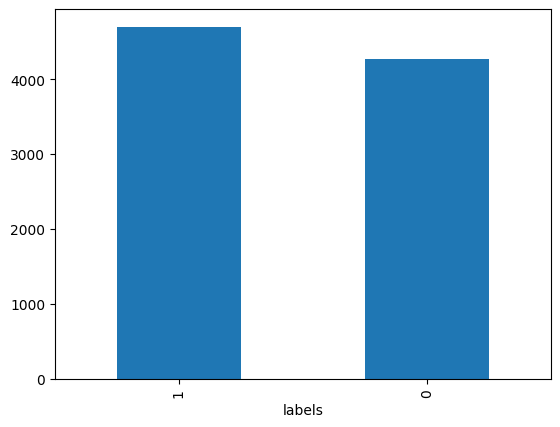

In [80]:
process_path = r"c:\Users\VIET HOANG - VTS\Desktop\tien xu ly\processed\dct_68.json"
processed_data, labels = load_data(process_path)
from sklearn.utils import shuffle
import pandas as pd

# Assuming processed_data and labels are pandas DataFrames
df = pd.concat([pd.DataFrame(processed_data), pd.DataFrame(labels)], axis=1)

# Shuffle the DataFrame
df = shuffle(df)
processed_data = df.iloc[:, :-1].values
labels = df.iloc[:, -1].values
df['labels'] = labels
df['labels'].value_counts().plot(kind='bar')
print(len(processed_data))

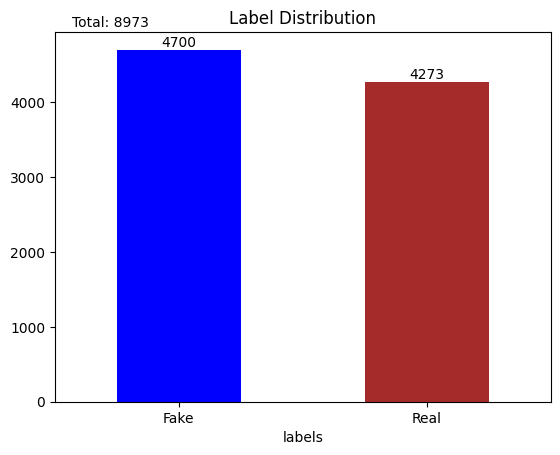

In [90]:
import matplotlib.pyplot as plt

# Get value counts
counts = df['labels'].value_counts()

# Create bar plot
colors = ['blue' if label == 1 else 'brown' for label in counts.index]
ax = counts.plot(kind='bar', color=colors)

# Annotate bars with their respective counts
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

# Annotate total count
total = counts.sum()
ax.annotate('Total: ' + str(total), xy=(0, 1), xytext=(12, 12), va='top',
             xycoords='axes fraction', textcoords='offset points')

# Rename the labels and set them horizontal
ax.set_xticklabels(['Real' if label == 1 else 'Fake' for label in ax.get_xticks()], rotation=0)
ax.set_title('Label Distribution')
# Display the plot
plt.show()

In [25]:
X_train, X_test, y_train, y_test = train_test_split(processed_data, labels, test_size=0.2, random_state=42)

# Use mfcc base instead of Discrete Cosine Transform

## Train 80(An+Trà) Test 20(An+Trà)

## SVM

In [5]:
X_train, X_test, y_train, y_test = train_test_split(processed_data, labels, test_size=0.2, random_state=42)

In [67]:
from sklearn.utils import shuffle
import pandas as pd

# Assuming processed_data and labels are pandas DataFrames
df = pd.concat([pd.DataFrame(processed_data), pd.DataFrame(labels)], axis=1)

# Shuffle the DataFrame
df = shuffle(df)
processed_data = df.iloc[:, :-1].values
labels = df.iloc[:, -1].values

In [68]:
X_train = processed_data[5000:]
y_train = labels[5000:]
X_test = processed_data[:5000]
y_test = labels[:5000]

In [69]:


from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
# Create a list of classifiers
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    SVC(gamma=4),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    KNeighborsClassifier(n_neighbors=2,weights='uniform'),
    GradientBoostingClassifier(),
    LinearDiscriminantAnalysis()
]

# Train and evaluate each classifier
for classifier in classifiers:
    classifier.fit(X_test, y_test)
    y_pred = classifier.predict(X_train)
    accuracy = accuracy_score(y_train, y_pred)
    print(f"{classifier.__class__.__name__}: Accuracy = {accuracy}")

c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression: Accuracy = 0.8323684872892021
DecisionTreeClassifier: Accuracy = 0.9353133652152026
SVC: Accuracy = 0.9848980619179462
RandomForestClassifier: Accuracy = 0.9856531588220488


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier: Accuracy = 0.9252454064938334
KNeighborsClassifier: Accuracy = 0.990183740246665
GradientBoostingClassifier: Accuracy = 0.9667757362194815
LinearDiscriminantAnalysis: Accuracy = 0.870375031462371


In [ ]:
for i in range(1,51):
    svmm = svm.SVC(C=i,gamma=4)
    svmm.fit(X_train,y_train)
    print(svmm.score(X_test,y_test))

In [7]:
print(len(processed_data))

5094


In [8]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

f1_macro_scores_svm = []
accuracy_scores_svm = []
precision_svm = []
recall_svm = []
processed_data = pd.DataFrame(processed_data)
labels = pd.DataFrame(labels)
for train_index, test_index in skf.split(processed_data, labels):
    X_train_fold, X_test_fold = processed_data.iloc[train_index], processed_data.iloc[test_index]
    y_train_fold, y_test_fold = labels.iloc[train_index], labels.iloc[test_index]
    clf = svm.SVC(C=2,gamma=3)
    # clf = BaggingClassifier(estimator=model, n_estimators=10, random_state=42)
    clf.fit(X_train_fold, y_train_fold)
    
    y_pred_fold = clf.predict(X_test_fold)

    f1_macro_fold = f1_score(y_test_fold, y_pred_fold, average='macro')

    f1_macro_scores_svm.append(f1_macro_fold)
    accuracy_scores_svm.append(accuracy_score(y_test_fold,y_pred_fold))
    recall_svm.append(recall_score(y_test_fold,y_pred_fold))
    precision_svm.append(precision_score(y_test_fold,y_pred_fold))
print("Average F1-macro:", np.mean(f1_macro_scores_svm))
print("average accuracy: ", np.mean(accuracy_scores_svm))
print("Average recall: ",np.mean(recall_svm))
print("Average precision: ",np.mean(precision_svm))

c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-pack

Average F1-macro: 0.9727520231355309
average accuracy:  0.974481682653415
Average recall:  0.9504673895625233
Average precision:  0.9819743137908772


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
import pandas as pd
from sklearn import svm
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

tscv = TimeSeriesSplit(n_splits=10,test_size=2,gap=2)


f1_macro_scores_svm = []
accuracy_scores_svm = []
precision_svm = []
recall_svm = []
processed_data = pd.DataFrame(processed_data)
labels = pd.DataFrame(labels)
for train_index, test_index in tscv.split(processed_data, labels):
    X_train_fold, X_test_fold = processed_data.iloc[train_index], processed_data.iloc[test_index]
    y_train_fold, y_test_fold = labels.iloc[train_index], labels.iloc[test_index]
    clf = svm.SVC(C=2,gamma=3)
    clf.fit(X_train_fold, y_train_fold)

    y_pred_fold = clf.predict(X_test_fold)

    f1_macro_fold = f1_score(y_test_fold, y_pred_fold, average='macro')

    f1_macro_scores_svm.append(f1_macro_fold)
    accuracy_scores_svm.append(accuracy_score(y_test_fold,y_pred_fold))
    recall_svm.append(recall_score(y_test_fold,y_pred_fold))
    precision_svm.append(precision_score(y_test_fold,y_pred_fold))
print("Average F1-macro:", np.mean(f1_macro_scores_svm))
print("average accuracy: ", np.mean(accuracy_scores_svm))
print("Average recall: ",np.mean(recall_svm))
print("Average precision: ",np.mean(precision_svm))

c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-pack

Average F1-macro: 1.0
average accuracy:  1.0
Average recall:  1.0
Average precision:  1.0


## KNeighborsClassifier

In [108]:
knb = KNeighborsClassifier(n_neighbors=1,weights='uniform')
knb.fit(X_train,y_train)
knb.score(X_test,y_test)

c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9747227658186562

In [109]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

f1_macro_scores_knb = []
accuracy_scores_knb = []
precision_knb = []
recall_knb = []
processed_data = pd.DataFrame(processed_data)
labels = pd.DataFrame(labels)
for train_index, test_index in skf.split(processed_data, labels):
    X_train_fold, X_test_fold = processed_data.iloc[train_index], processed_data.iloc[test_index]
    y_train_fold, y_test_fold = labels.iloc[train_index], labels.iloc[test_index]
    clf = KNeighborsClassifier(n_neighbors=2,weights='uniform')
    clf.fit(X_train_fold, y_train_fold)

    y_pred_fold = clf.predict(X_test_fold)

    f1_macro_fold = f1_score(y_test_fold, y_pred_fold, average='macro')

    f1_macro_scores_knb.append(f1_macro_fold)
    accuracy_scores_knb.append(accuracy_score(y_test_fold,y_pred_fold))
    recall_knb.append(recall_score(y_test_fold,y_pred_fold))
    precision_knb.append(precision_score(y_test_fold,y_pred_fold))

print("Average F1-macro:", np.mean(f1_macro_scores_knb))
print("average accuracy: ", np.mean(accuracy_scores_knb))
print("Average recall: ",np.mean(recall_knb))
print("Average precision: ",np.mean(precision_knb))

c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-package

Average F1-macro: 0.9848767347565099
average accuracy:  0.9851261739985908
Average recall:  0.9807049456922916
Average precision:  0.9930219931162071


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


## Random Forest

In [110]:
rf = RandomForestClassifier(n_estimators = 200,criterion='log_loss',min_samples_leaf=2,min_samples_split=2)
rf.fit(X_train,y_train)
print(rf.score(X_test,y_test))

c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9515655577299413


In [111]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

f1_macro_scores_rf = []
accuracy_scores_rf = []
precision_rf = []
recall_rf = []
processed_data = pd.DataFrame(processed_data)
labels = pd.DataFrame(labels)
for train_index, test_index in skf.split(processed_data, labels):
    X_train_fold, X_test_fold = processed_data.iloc[train_index], processed_data.iloc[test_index]
    y_train_fold, y_test_fold = labels.iloc[train_index], labels.iloc[test_index]
    clf = RandomForestClassifier(n_estimators = 200,criterion='log_loss',min_samples_leaf=2,min_samples_split=2)
    clf.fit(X_train_fold, y_train_fold)

    y_pred_fold = clf.predict(X_test_fold)

    f1_macro_fold = f1_score(y_test_fold, y_pred_fold, average='macro')

    f1_macro_scores_rf.append(f1_macro_fold)
    accuracy_scores_rf.append(accuracy_score(y_test_fold,y_pred_fold))
    recall_rf.append(recall_score(y_test_fold,y_pred_fold))
    precision_rf.append(precision_score(y_test_fold,y_pred_fold))

print("Average F1-macro:", np.mean(f1_macro_scores_rf))
print("average accuracy: ", np.mean(accuracy_scores_rf))
print("Average recall: ",np.mean(recall_rf))
print("Average precision: ",np.mean(precision_rf))

c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\sit

Average F1-macro: 0.9754185477823487
average accuracy:  0.9758625208928345
Average recall:  0.9774849731097754
Average precision:  0.9800441365501487


## GradientBoostingClassifier

In [66]:
gb_classifier = GradientBoostingClassifier(n_estimators=1000,learning_rate=0.01)
gb_classifier.fit(X_train,y_train)
gb_classifier.score(X_test,y_test)

c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9659300184162063

# Train Trà, Test An

SVM, Randomforest, Knb, GradientBoosting, logistic regression

Code to run all

In [156]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score

# Khởi tạo mô hình với các tham số từ file tham khảo
clf = LGBMClassifier(
    nthread=4,
    n_estimators=10000,
    learning_rate=0.02,
    num_leaves=128,
    colsample_bytree=0.9497036,
    subsample=0.8715623,
    max_depth=8,
    reg_alpha=0.041545473,
    reg_lambda=0.0735294,
    min_split_gain=0.0222415,
    min_child_weight=39.3259775,
    silent=-1,
    verbose=-1
)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

f1_macro_scores = []
processed_data = pd.DataFrame(processed_data)
labels = pd.DataFrame(labels)
for train_index, test_index in skf.split(processed_data, labels):
    X_train_fold, X_test_fold = processed_data.iloc[train_index], processed_data.iloc[test_index]
    y_train_fold, y_test_fold = labels.iloc[train_index], labels.iloc[test_index]

    clf.fit(X_train_fold, y_train_fold)

    y_pred_fold = clf.predict(X_test_fold)

    f1_macro_fold = f1_score(y_test_fold, y_pred_fold, average='macro')

    f1_macro_scores.append(f1_macro_fold)

for fold, f1_macro_score in enumerate(f1_macro_scores):
    print(f"Fold {fold+1} F1-macro:", f1_macro_score)

print("Average F1-macro:", np.mean(f1_macro_scores))


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Progr

Fold 1 F1-macro: 0.965879500441167
Fold 2 F1-macro: 0.972502330120951
Fold 3 F1-macro: 0.9649229334182403
Fold 4 F1-macro: 0.967736369910283
Fold 5 F1-macro: 0.9677655677655678
Average F1-macro: 0.967761340331242


In [20]:


from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
# Create a list of classifiers
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    SVC(gamma=3),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    KNeighborsClassifier(n_neighbors=2,weights='uniform'),
    GradientBoostingClassifier(),
    LinearDiscriminantAnalysis()
]

# Train and evaluate each classifier
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{classifier.__class__.__name__}: Accuracy = {accuracy}")

LogisticRegression: Accuracy = 0.4263420724094881
DecisionTreeClassifier: Accuracy = 0.6573033707865169
SVC: Accuracy = 0.5923845193508115
RandomForestClassifier: Accuracy = 0.49812734082397003


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier: Accuracy = 0.38202247191011235
KNeighborsClassifier: Accuracy = 0.5287141073657927
GradientBoostingClassifier: Accuracy = 0.3838951310861423
LinearDiscriminantAnalysis: Accuracy = 0.4313358302122347


In [6]:
import time

def data_for_chart(model):
    directory = r"C:\Users\VIET HOANG - VTS\Desktop\tien xu ly\processed"
    file_names = os.listdir(directory)
    svm_accu = []
    svm_pre = []
    svm_recall = []
    svm_f1 = []
    svm_time = []  # List to store time taken for each run
    for file_name in file_names:
        file_path = os.path.join(directory, file_name)
        processed_data, labels = load_data(file_path)
        df = pd.concat([pd.DataFrame(processed_data), pd.DataFrame(labels)], axis=1)
        df = shuffle(df)
        processed_data = df.iloc[:, :-1].values
        labels = df.iloc[:, -1].values
        f1_macro_scores_svm = []
        accuracy_scores_svm = []
        precision_svm = []
        recall_svm = []
        skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
        processed_data = pd.DataFrame(processed_data)
        labels = pd.DataFrame(labels)
        for train_index, test_index in skf.split(processed_data, labels):
            X_train_fold, X_test_fold = processed_data.iloc[train_index], processed_data.iloc[test_index]
            y_train_fold, y_test_fold = labels.iloc[train_index], labels.iloc[test_index]
            clf = model
            start_time = time.time()  # Start time
            clf.fit(X_train_fold, y_train_fold)
            y_pred_fold = clf.predict(X_test_fold)
            end_time = time.time()  # End time
            svm_time.append(end_time - start_time)  # Append the time difference to the list
            f1_macro_fold = f1_score(y_test_fold, y_pred_fold, average='macro')
            f1_macro_scores_svm.append(f1_macro_fold)
            accuracy_scores_svm.append(accuracy_score(y_test_fold,y_pred_fold))
            recall_svm.append(recall_score(y_test_fold,y_pred_fold))
            precision_svm.append(precision_score(y_test_fold,y_pred_fold))
        svm_accu.append(np.mean(accuracy_scores_svm))
        svm_pre.append(np.mean(precision_svm))
        svm_recall.append(np.mean(recall_svm))
        svm_f1.append(np.mean(f1_macro_scores_svm))
    print(type(model).__name__)
    print("Accuracy: ", np.mean(svm_accu))
    print("Precision: ", np.mean(svm_pre))
    print("Recall: ", np.mean(svm_recall))
    print("F1: ", np.mean(svm_f1))
    print("Average computing time: ", np.mean(svm_time))  # Print the average computing time
    return svm_accu, svm_pre, svm_recall, svm_f1, svm_time  # Return the list of times
svm_accu,svm_pre,svm_recall,svm_f1,svm_time = data_for_chart(svm.SVC(C=2,gamma=3))

c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-pack

SVC
Accuracy:  0.9896994855041326
Precision:  0.9924918306192642
Recall:  0.9878200209277992
F1:  0.9896789752263625
Average computing time:  2.792724763760801


In [7]:
knn_accu,knn_pre,knn_recall,knn_f1,knn_time= data_for_chart(KNeighborsClassifier(n_neighbors=2,weights='uniform'))

c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-package

KNeighborsClassifier
Accuracy:  0.9921275306310872
Precision:  0.9983872342494876
Recall:  0.986567840948727
F1:  0.9921144851751996
Average computing time:  0.14346682986275094


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [8]:
rf_accu,rf_pre,rf_recall,rf_f1,rf_time = data_for_chart(RandomForestClassifier(n_estimators = 200,criterion='log_loss',min_samples_leaf=2,min_samples_split=2))

c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\sit

KeyboardInterrupt: 

In [9]:
lda_accu,lda_pre,lda_recall,lda_f1,lda_time = data_for_chart(LinearDiscriminantAnalysis(n_components=1,solver='svd'))

c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-pack

LinearDiscriminantAnalysis
Accuracy:  0.8591658016162776
Precision:  0.8799686076112194
Recall:  0.8476002790373213
F1:  0.858996304658937
Average computing time:  0.051211254323115116


In [10]:
lg_accu,lg_pre,lg_recall,lg_f1,lg_time = data_for_chart(LogisticRegression(C=1,solver='liblinear',penalty='l1'))

c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-pack

LogisticRegression
Accuracy:  0.853454826663684
Precision:  0.8709720985507206
Recall:  0.846093477502616
F1:  0.8532612505443629
Average computing time:  32.56364773844109


In [21]:
svm_t = []

for i in range(61):
    abc = []
    for j in range(10):
        abc.append(svm_time[j + i * 10])
    svm_t.append(np.mean(abc))
print(svm_t)


[1.235162901878357, 1.1257415771484376, 1.002158761024475, 1.4583539485931396, 1.1284728527069092, 1.0868005514144898, 1.0788994789123536, 1.0611039638519286, 1.0471960306167603, 1.0526797294616699, 0.9978564023971558, 0.9525076866149902, 0.7869456291198731, 0.8597484111785889, 0.8104965448379516, 0.8257346391677857, 0.8431260108947753, 0.8268877983093261, 0.8264020919799805, 0.8628824949264526, 2.1458768606185914, 2.28146812915802, 2.1968595027923583, 2.4708236932754515, 1.9826444149017335, 2.1757570028305055, 3.5344157934188845, 3.500154972076416, 2.3877201795578005, 3.1908334732055663, 6.456803941726685, 5.9469218254089355, 5.483722758293152, 6.049038219451904, 4.698949074745178, 5.083706498146057, 4.384203982353211, 3.5999933004379274, 3.4635990858078003, 3.632023477554321, 3.660071325302124, 3.7813869953155517, 3.549066185951233, 3.5100069522857664, 3.817079710960388, 2.994610643386841, 3.6997369050979616, 3.739632725715637, 3.4353345394134522, 3.745290756225586, 3.499210643768310

In [23]:
knn_t = []
lda_t = []
lg_t = []
svm_t = []

for i in range(61):
    abc_knn = []
    abc_lda = []
    abc_lg = []
    abc_svm = []
    for j in range(10):
        abc_knn.append(knn_time[j + i * 10])
        abc_lda.append(lda_time[j + i * 10])
        abc_lg.append(lg_time[j + i * 10])
        abc_svm.append(svm_time[j + i * 10])
    knn_t.append(np.mean(abc_knn))
    lda_t.append(np.mean(abc_lda))
    lg_t.append(np.mean(abc_lg))
    svm_t.append(np.mean(abc_svm))
print(knn_t)
print(lda_t)
print(lg_t)
print(svm_t)

[0.2363649606704712, 0.1295016050338745, 0.1553253173828125, 0.12094559669494628, 0.1321519136428833, 0.1303469181060791, 0.12205877304077148, 0.1290229082107544, 0.12902414798736572, 0.13030459880828857, 0.12867474555969238, 0.12641475200653077, 0.12988510131835937, 0.14056503772735596, 0.13613476753234863, 0.13493678569793702, 0.13223814964294434, 0.1310799837112427, 0.1358020544052124, 0.1312030792236328, 0.15437805652618408, 0.15111908912658692, 0.1359189748764038, 0.12956478595733642, 0.14398436546325682, 0.1454935073852539, 0.13930134773254393, 0.1324463367462158, 0.13721771240234376, 0.13912010192871094, 0.16263813972473146, 0.16188523769378663, 0.13496832847595214, 0.1361783504486084, 0.13565690517425538, 0.1419834852218628, 0.16397314071655272, 0.1332622766494751, 0.1424877405166626, 0.14059662818908691, 0.14430999755859375, 0.14300148487091063, 0.13512561321258545, 0.15484013557434081, 0.1600299596786499, 0.17053546905517578, 0.14735627174377441, 0.14336581230163575, 0.160469

In [24]:
def save_result_chart(path,accu,pre,recall,f1,timee):
    data = {
        'Accuracy': accu,
        'Precision': pre,
        'Recall': recall,
        'F1': f1,
        'time' : timee
    }
    df = pd.DataFrame(data)
    df.to_json(path)


path = r"C:\Users\VIET HOANG - VTS\Desktop\tien xu ly\result\svm.json"
save_result_chart(path,svm_accu,svm_pre,svm_recall,svm_f1,svm_t)
path = r"C:\Users\VIET HOANG - VTS\Desktop\tien xu ly\result\knn.json"
save_result_chart(path,knn_accu,knn_pre,knn_recall,knn_f1,knn_t)
path = r"C:\Users\VIET HOANG - VTS\Desktop\tien xu ly\result\lda.json"
save_result_chart(path,lda_accu,lda_pre,lda_recall,lda_f1,lda_t)
path = r"C:\Users\VIET HOANG - VTS\Desktop\tien xu ly\result\lg.json"
save_result_chart(path,lg_accu,lg_pre,lg_recall,lg_f1,lg_t)

In [ ]:
path = r"C:\Users\VIET HOANG - VTS\Desktop\tien xu ly\result\rf.json"
save_result_chart(path,rf_accu,rf_pre,rf_recall,rf_f1,rf_time)

In [2]:
def load_result_chart(path):
    with open(path, 'r') as file:
        data = json.load(file)
    accuracy = [a for a in data['Accuracy'].values()]
    precision = [a for a in data['Precision'].values()]
    recall = [a for a in data['Recall'].values()]
    f1 = [a for a in data['F1'].values()]
    time = [a for a in data['time'].values()]
    return accuracy,precision,recall,f1,time

In [4]:
rf_path = r"C:\Users\VIET HOANG - VTS\Desktop\tien xu ly\result\rf.json"
rf_accu,rf_pre,rf_recall,rf_f1,rf_t = load_result_chart(rf_path)
svm_path = r"C:\Users\VIET HOANG - VTS\Desktop\tien xu ly\result\svm.json"
svm_accu,svm_pre,svm_recall,svm_f1,svm_t = load_result_chart(svm_path)
knn_path = r"C:\Users\VIET HOANG - VTS\Desktop\tien xu ly\result\knn.json"
knn_accu,knn_pre,knn_recall,knn_f1,knn_t = load_result_chart(knn_path)
lda_path = r"C:\Users\VIET HOANG - VTS\Desktop\tien xu ly\result\lda.json"
lda_accu,lda_pre,lda_recall,lda_f1,lda_t= load_result_chart(lda_path)
lg_path = r"C:\Users\VIET HOANG - VTS\Desktop\tien xu ly\result\lg.json"
lg_accu,lg_pre,lg_recall,lg_f1,lg_t = load_result_chart(lg_path)

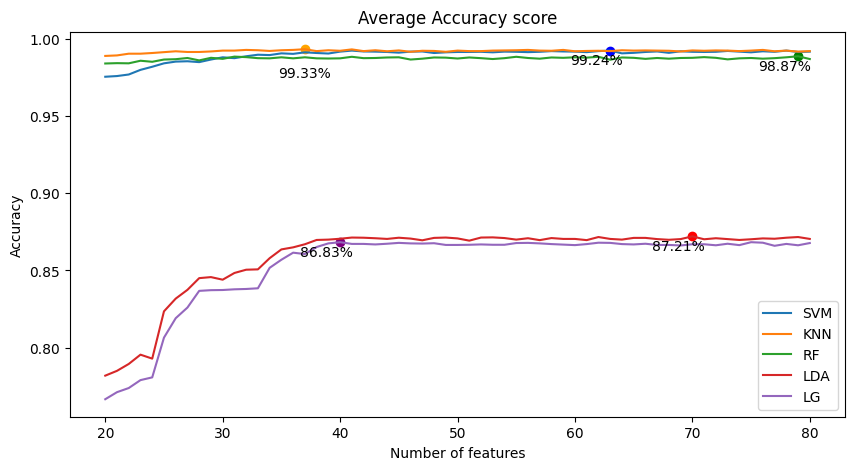

In [38]:
import numpy as np

# Find the index of the maximum value in each list
max_svm_index = np.argmax(svm_accu)
max_knn_index = np.argmax(knn_accu)
max_rf_index = np.argmax(rf_accu)
max_lda_index = np.argmax(lda_accu)
max_lg_index = np.argmax(lg_accu)

plt.figure(figsize=(10, 5)) 
# Plot the lines
plt.plot([i for i in range(20,81)],svm_accu,label='SVM')
plt.plot([i for i in range(20,81)],knn_accu,label='KNN')
plt.plot([i for i in range(20,81)],rf_accu,label='RF')
plt.plot([i for i in range(20,81)],lda_accu,label='LDA')
plt.plot([i for i in range(20,81)],lg_accu,label='LG')

# Mark the highest points
plt.scatter(max_svm_index + 20, svm_accu[max_svm_index], color='blue')
plt.scatter(max_knn_index + 20, knn_accu[max_knn_index], color='orange')
plt.scatter(max_rf_index + 20, rf_accu[max_rf_index], color='green')
plt.scatter(max_lda_index + 20, lda_accu[max_lda_index], color='red')
plt.scatter(max_lg_index + 20, lg_accu[max_lg_index], color='purple')

# Annotate the highest points
plt.annotate(f'{round(svm_accu[max_svm_index],4)*100}%', (max_svm_index + 20, svm_accu[max_svm_index]), textcoords="offset points", xytext=(-10,-10), ha='center')
plt.annotate(f'{round(knn_accu[max_knn_index],4)*100}%', (max_knn_index + 20, knn_accu[max_knn_index]), textcoords="offset points", xytext=(0,-20), ha='center')  # Adjusted for KNN
plt.annotate(f'{round(rf_accu[max_rf_index],4)*100}%', (max_rf_index + 20, rf_accu[max_rf_index]), textcoords="offset points", xytext=(-10,-10), ha='center')
plt.annotate(f'{round(lda_accu[max_lda_index],4)*100}%', (max_lda_index + 20, lda_accu[max_lda_index]), textcoords="offset points", xytext=(-10,-10), ha='center')
plt.annotate(f'{round(lg_accu[max_lg_index],4)*100}%', (max_lg_index + 20, lg_accu[max_lg_index]), textcoords="offset points", xytext=(-10,-10), ha='center')

plt.title('Average Accuracy score')
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

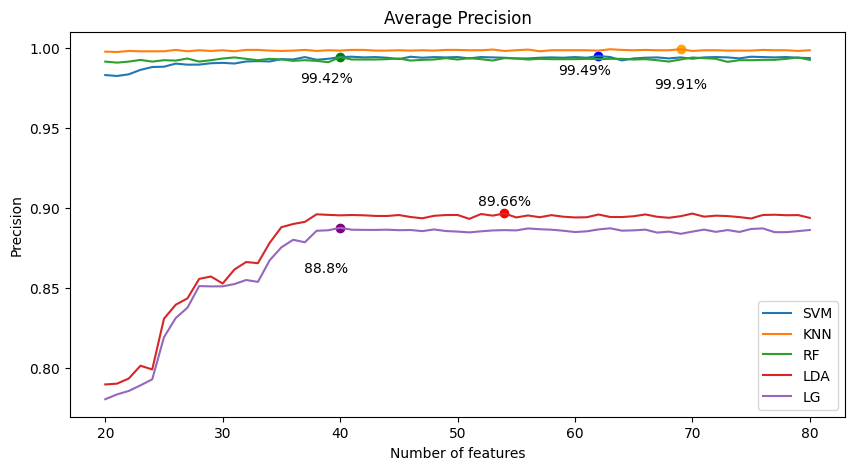

In [61]:
import numpy as np

# Find the index of the maximum value in each list
max_svm_index = np.argmax(svm_pre)
max_knn_index = np.argmax(knn_pre)
max_rf_index = np.argmax(rf_pre)
max_lda_index = np.argmax(lda_pre)
max_lg_index = np.argmax(lg_pre)
plt.figure(figsize=(10, 5)) 
# Plot the lines
plt.plot([i for i in range(20,81)],svm_pre,label='SVM')
plt.plot([i for i in range(20,81)],knn_pre,label='KNN')
plt.plot([i for i in range(20,81)],rf_pre,label='RF')
plt.plot([i for i in range(20,81)],lda_pre,label='LDA')
plt.plot([i for i in range(20,81)],lg_pre,label='LG')

# Mark the highest points
plt.scatter(max_svm_index + 20, svm_pre[max_svm_index], color='blue')
plt.scatter(max_knn_index + 20, knn_pre[max_knn_index], color='orange')
plt.scatter(max_rf_index + 20, rf_pre[max_rf_index], color='green')
plt.scatter(max_lda_index + 20, lda_pre[max_lda_index], color='red')
plt.scatter(max_lg_index + 20, lg_pre[max_lg_index], color='purple')

# Annotate the highest points
plt.annotate(f'{round(svm_pre[max_svm_index],4)*100}%', (max_svm_index + 20, svm_accu[max_svm_index]), textcoords="offset points", xytext=(-10,-10), ha='center')
plt.annotate(f'{round(knn_pre[max_knn_index],4)*100}%', (max_knn_index + 20, knn_accu[max_knn_index]), textcoords="offset points", xytext=(0,-20), ha='center')  # Adjusted for KNN
plt.annotate(f'{round(rf_pre[max_rf_index],4)*100}%', (max_rf_index + 20, rf_accu[max_rf_index]), textcoords="offset points", xytext=(-10,-10), ha='center')
plt.annotate(f'{round(lda_pre[max_lda_index],4)*100}%', (max_lda_index + 20, lda_accu[max_lda_index]), textcoords="offset points", xytext=(0,35), ha='center')
plt.annotate(f'{round(lg_pre[max_lg_index],3)*100}%', (max_lg_index + 20, lg_accu[max_lg_index]), textcoords="offset points", xytext=(-10,-10), ha='center')

plt.title('Average Precision')
plt.xlabel('Number of features')
plt.ylabel('Precision')
plt.legend()
plt.show()

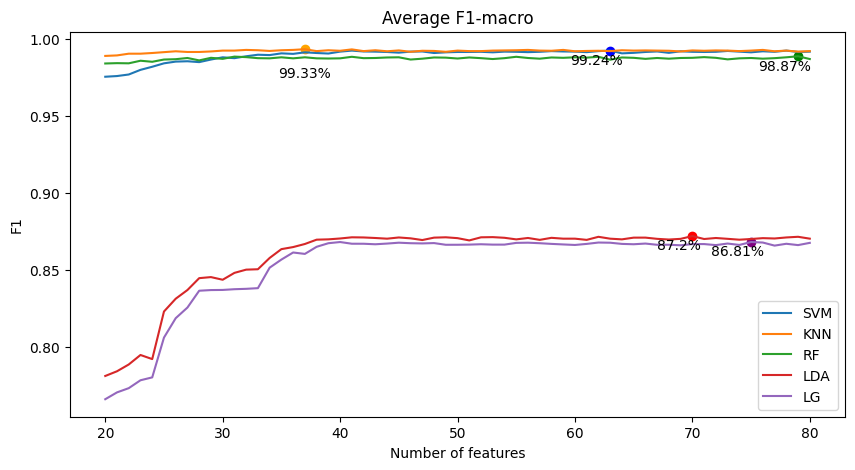

In [40]:
import numpy as np

# Find the index of the maximum value in each list
max_svm_index = np.argmax(svm_f1)
max_knn_index = np.argmax(knn_f1)
max_rf_index = np.argmax(rf_f1)
max_lda_index = np.argmax(lda_f1)
max_lg_index = np.argmax(lg_f1)
plt.figure(figsize=(10, 5)) 
# Plot the lines
plt.plot([i for i in range(20,81)],svm_f1,label='SVM')
plt.plot([i for i in range(20,81)],knn_f1,label='KNN')
plt.plot([i for i in range(20,81)],rf_f1,label='RF')
plt.plot([i for i in range(20,81)],lda_f1,label='LDA')
plt.plot([i for i in range(20,81)],lg_f1,label='LG')

# Mark the highest points
plt.scatter(max_svm_index + 20, svm_f1[max_svm_index], color='blue')
plt.scatter(max_knn_index + 20, knn_f1[max_knn_index], color='orange')
plt.scatter(max_rf_index + 20, rf_f1[max_rf_index], color='green')
plt.scatter(max_lda_index + 20, lda_f1[max_lda_index], color='red')
plt.scatter(max_lg_index + 20, lg_f1[max_lg_index], color='purple')

# Annotate the highest points
plt.annotate(f'{round(svm_f1[max_svm_index],4)*100}%', (max_svm_index + 20, svm_accu[max_svm_index]), textcoords="offset points", xytext=(-10,-10), ha='center')
plt.annotate(f'{round(knn_f1[max_knn_index],4)*100}%', (max_knn_index + 20, knn_accu[max_knn_index]), textcoords="offset points", xytext=(0,-20), ha='center')  # Adjusted for KNN
plt.annotate(f'{round(rf_f1[max_rf_index],4)*100}%', (max_rf_index + 20, rf_accu[max_rf_index]), textcoords="offset points", xytext=(-10,-10), ha='center')
plt.annotate(f'{round(lda_f1[max_lda_index],4)*100}%', (max_lda_index + 20, lda_accu[max_lda_index]), textcoords="offset points", xytext=(-10,-10), ha='center')
plt.annotate(f'{round(lg_f1[max_lg_index],4)*100}%', (max_lg_index + 20, lg_accu[max_lg_index]), textcoords="offset points", xytext=(-10,-10), ha='center')

plt.title('Average F1-macro')
plt.xlabel('Number of features')
plt.ylabel('F1')
plt.legend()
plt.show()

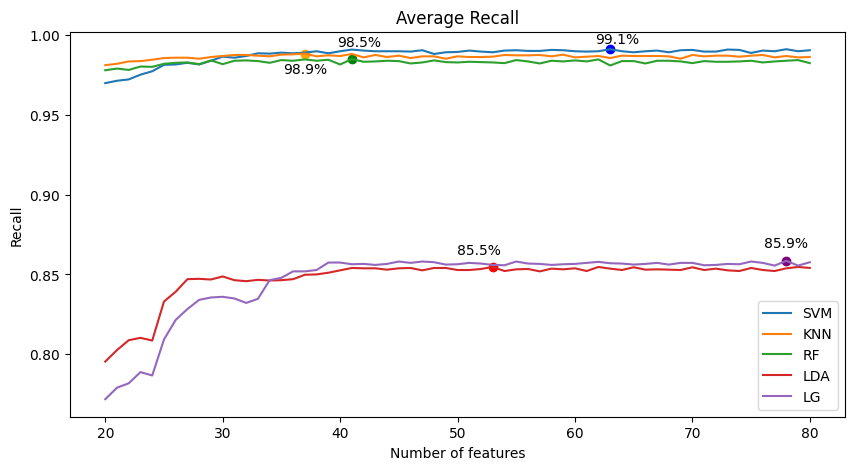

In [56]:
import numpy as np

# Find the index of the maximum value in each list
max_svm_index = np.argmax(svm_recall)
max_knn_index = np.argmax(knn_recall)
max_rf_index = np.argmax(rf_recall)
max_lda_index = np.argmax(lda_recall)
max_lg_index = np.argmax(lg_recall)
plt.figure(figsize=(10, 5)) 
# Plot the lines
plt.plot([i for i in range(20,81)],svm_recall,label='SVM')
plt.plot([i for i in range(20,81)],knn_recall,label='KNN')
plt.plot([i for i in range(20,81)],rf_recall,label='RF')
plt.plot([i for i in range(20,81)],lda_recall,label='LDA')
plt.plot([i for i in range(20,81)],lg_recall,label='LG')

# Mark the highest points
plt.scatter(max_svm_index + 20, svm_recall[max_svm_index], color='blue')
plt.scatter(max_knn_index + 20, knn_recall[max_knn_index], color='orange')
plt.scatter(max_rf_index + 20, rf_recall[max_rf_index], color='green')
plt.scatter(max_lda_index + 20, lda_recall[max_lda_index], color='red')
plt.scatter(max_lg_index + 20, lg_recall[max_lg_index], color='purple')

# Annotate the highest points
# Annotate the highest points
plt.annotate(f'{round(svm_recall[max_svm_index],3)*100}%', (max_svm_index + 20, svm_accu[max_svm_index]), textcoords="offset points", xytext=(5,3), ha='center')
plt.annotate(f'{round(knn_recall[max_knn_index],3)*100}%', (max_knn_index + 20, knn_accu[max_knn_index]), textcoords="offset points", xytext=(0,-20), ha='center')  # Adjusted for KNN
plt.annotate(f'{round(rf_recall[max_rf_index],3)*100}%', (max_rf_index + 20, rf_accu[max_rf_index]), textcoords="offset points", xytext=(5,5), ha='center')
plt.annotate(f'{round(lda_recall[max_lda_index],3)*100}%', (max_lda_index + 20, lda_accu[max_lda_index]), textcoords="offset points", xytext=(-10,-10), ha='center')
plt.annotate(f'{round(lg_recall[max_lg_index],3)*100}%', (max_lg_index + 20, lg_accu[max_lg_index]), textcoords="offset points", xytext=(0,0), ha='center')

plt.title('Average Recall')
plt.xlabel('Number of features')
plt.ylabel('Recall')
plt.legend()
plt.show()

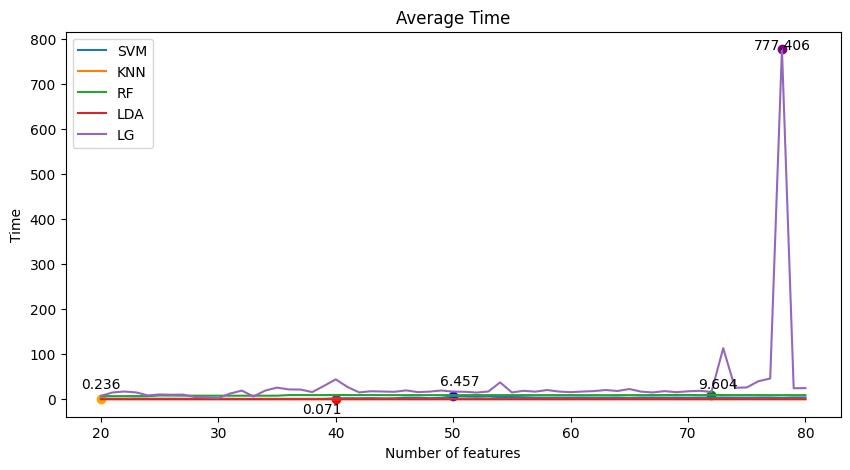

In [10]:
import numpy as np

# Find the index of the maximum value in each list
max_svm_index = np.argmax(svm_t)
max_knn_index = np.argmax(knn_t)
max_rf_index = np.argmax(rf_t)
max_lda_index = np.argmax(lda_t)
max_lg_index = np.argmax(lg_t)

plt.figure(figsize=(10, 5)) 

# Plot the lines
plt.plot([i for i in range(20,81)],svm_t,label='SVM')
plt.plot([i for i in range(20,81)],knn_t,label='KNN')
plt.plot([i for i in range(20,81)],rf_t,label='RF')
plt.plot([i for i in range(20,81)],lda_t,label='LDA')
plt.plot([i for i in range(20,81)],lg_t,label='LG')

# Mark the highest points
plt.scatter(max_svm_index + 20, svm_t[max_svm_index], color='blue')
plt.scatter(max_knn_index + 20, knn_t[max_knn_index], color='orange')
plt.scatter(max_rf_index + 20, rf_t[max_rf_index], color='green')
plt.scatter(max_lda_index + 20, lda_t[max_lda_index], color='red')
plt.scatter(max_lg_index + 20, lg_t[max_lg_index], color='purple')

# Annotate the highest points
plt.annotate(f'{round(svm_t[max_svm_index],3)}', (max_svm_index + 20, svm_t[max_svm_index]), textcoords="offset points", xytext=(5,8), ha='center')
plt.annotate(f'{round(knn_t[max_knn_index],3)}', (max_knn_index + 20, knn_t[max_knn_index]), textcoords="offset points", xytext=(0,8), ha='center')  # Adjusted for KNN
plt.annotate(f'{round(rf_t[max_rf_index],3)}', (max_rf_index + 20, rf_t[max_rf_index]), textcoords="offset points", xytext=(5,5), ha='center')
plt.annotate(f'{round(lda_t[max_lda_index],3)}', (max_lda_index + 20, lda_t[max_lda_index]), textcoords="offset points", xytext=(-10,-10), ha='center')
plt.annotate(f'{round(lg_t[max_lg_index],3)}', (max_lg_index + 20, lg_t[max_lg_index]), textcoords="offset points", xytext=(0,0), ha='center')

plt.title('Average Time')
plt.xlabel('Number of features')
plt.ylabel('Time')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import librosa
from sklearn.preprocessing import StandardScaler
from scipy.fftpack import dct

def preprocessing(audio_file, frame_length):
    # Load the audio signal
    y, sr = librosa.load(audio_file, sr=None)

    # Step 1: Pre-emphasis
    pre_emphasis_coeff = 0.97
    y_filt = librosa.effects.preemphasis(y, coef=pre_emphasis_coeff)

    # Step 2: Frame blocking
    frame_length = frame_length # 25 ms
    hop_length = 0.01  # 10 ms
    frame_length_samples = int(frame_length * sr)
    hop_length_samples = int(hop_length * sr)
    frames = librosa.util.frame(y_filt, frame_length=frame_length_samples, hop_length=hop_length_samples).T

    # Step 3: Windowing
    window = np.hamming(frame_length_samples)
    windowed_frames = frames * window

    # Step 4: Fast Fourier Transform (FFT)
    fft_size = 2048
    spectrogram = np.abs(np.fft.rfft(windowed_frames, n=fft_size))

    # Step 5: Mel frequency wrapping
    n_mels = 40  # Adjusted number of Mel bands
    mel_spec = librosa.feature.melspectrogram(S=spectrogram.T, sr=sr, n_mels=n_mels)

    # Step 6: Log Mel Spectrogram
    log_mel_spec = librosa.power_to_db(mel_spec)
    
    # Step 7: Discrete Cosine Transform (DCT) to get DCT features
    dct_features = dct(log_mel_spec, type=2, axis=0, norm='ortho')[:68]
    
    mean_dct = np.mean(dct_features, axis=1)

    # Initialize the StandardScaler
    scaler = StandardScaler()

    # Reshape the aggregated DCTs to 2D (needed for fitting the scaler)
    mean_dct_reshaped = mean_dct.reshape(-1, 1)

    # Fit and transform the data
    mean_dct_scaled = scaler.fit_transform(mean_dct_reshaped)

    # Flatten the scaled data back to 1D
    mean_dct_scaled_flat = mean_dct_scaled.flatten()

    return mean_dct_scaled_flat

frame_lenght = 0.2
for i in range(1,17):
    url = r"path/to/load"
    files, labels = load_data_ult(url)
    files = [preprocessing(file,i) for file in files]
    url = f"path/to/leng{frame_lenght}"
    save_data(url,files,labels)
    print(f"Save data succeed: {url}")